In [25]:
text_data = ["I love love dogs and dogs and cats", "I hate dogs but love cats and dogs", "Dogs are my favorite animal"]

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

def get_bow(text_data):
    # create the vocabulary
    vectorizer = CountVectorizer(input='content', stop_words=None, ngram_range=(1,1))
    
    # fit the vocabulary to the text data
    vectorizer.fit(text_data)
    
    # create the bag-of-words model
    bow_model = vectorizer.transform(text_data)

    return vectorizer, bow_model

In [27]:
vectorizer, bow_model = get_bow(text_data)

# print the vocabulary
print(vectorizer.vocabulary_)

{'love': 8, 'dogs': 5, 'and': 0, 'cats': 4, 'hate': 7, 'but': 3, 'are': 2, 'my': 9, 'favorite': 6, 'animal': 1}


In [28]:
print(bow_model)

  (0, 0)	2
  (0, 4)	1
  (0, 5)	2
  (0, 8)	2
  (1, 0)	1
  (1, 3)	1
  (1, 4)	1
  (1, 5)	2
  (1, 7)	1
  (1, 8)	1
  (2, 1)	1
  (2, 2)	1
  (2, 5)	1
  (2, 6)	1
  (2, 9)	1


In [29]:
bow_model.shape #(nb_docs, len_vocab)

(3, 10)

In [30]:
bow_model[0,0] #frequency of word 0 in doc 0

2

In [31]:
vectorizer.vocabulary_['dogs'] #id of word 'dogs' 

5

In [32]:
print(bow_model[:, 5]) #frequency of word 'dogs' (id=5) per document

  (0, 0)	2
  (1, 0)	2
  (2, 0)	1


In [33]:
bow_model[:, 5].sum(axis=0) #total frequency of word 'dogs' (id=5) in the docs. (sum over column 5 in the bow matrix)

matrix([[5]])

**BoW on open tasks**

In [34]:
import pandas as pd

In [56]:
df = pd.read_csv("data/preprocessed_open_tasks_DE.csv")
text_data = df["preprocess_desc"].tolist()
vectorizer, bow_model = get_bow(text_data) 
words = vectorizer.vocabulary_.keys()
word_lengths = [len(word) for word in words] 
print(bow_model.shape)
min(word_lengths), max(word_lengths)

(1570, 4961)


(2, 30)

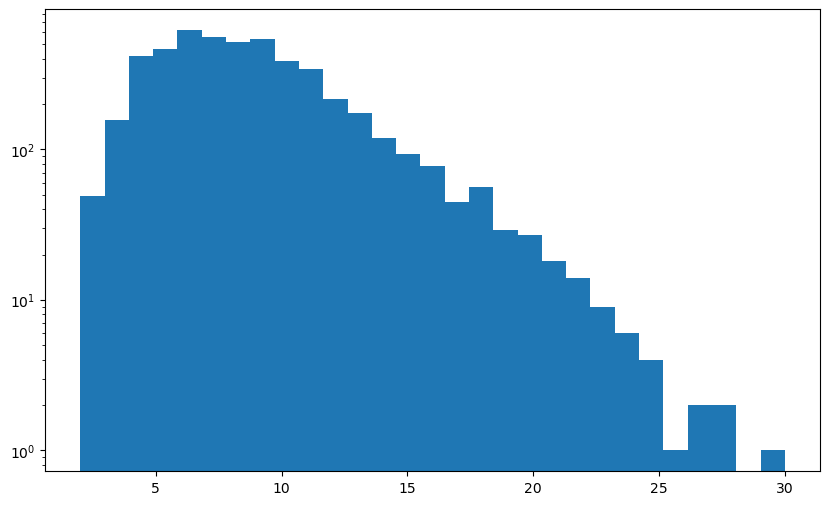

In [55]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
plt.hist(word_lengths, bins=max(word_lengths)-min(word_lengths)+1)
ax.set_yscale("log")

In [57]:
df = pd.read_csv("data/preprocessed_open_tasks_EN.csv")
text_data = df["preprocess_desc"].tolist()
vectorizer, bow_model = get_bow(text_data) 
words = vectorizer.vocabulary_.keys()
word_lengths = [len(word) for word in words] 
print(bow_model.shape)
min(word_lengths), max(word_lengths)

(283, 1265)


(2, 22)

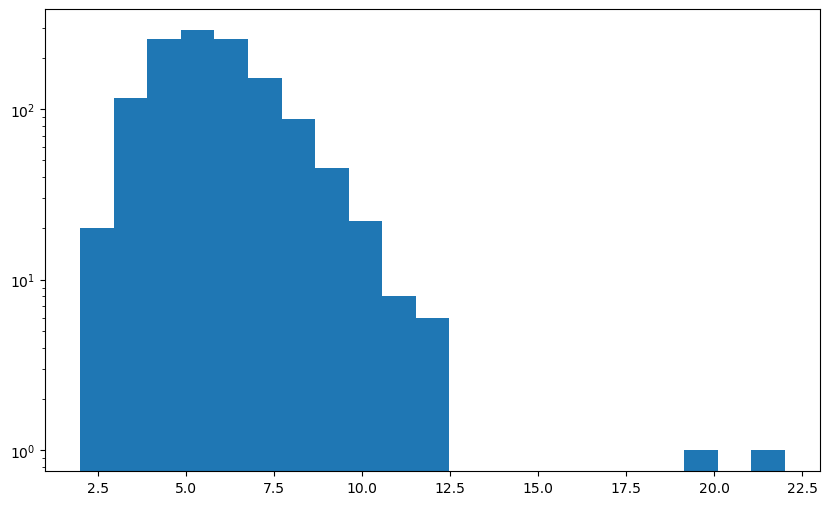

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
plt.hist(word_lengths, bins=max(word_lengths)-min(word_lengths)+1)
ax.set_yscale("log")